In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Uber_Request_Data.csv")
data.head(9)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [4]:
data1 = data[["Pickup point","Status",
              "Request timestamp","Drop timestamp"]]
data1.head(9)

,Pickup point,Status,Request timestamp,Drop timestamp
0,Airport,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,Airport,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,City,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,Airport,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,Airport,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,Airport,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,Airport,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,City,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51


In [5]:
def to_date(dat):
    dat = str(dat)
    if len(dat)>3:
        if "-" in dat:
            try:
                return datetime.strptime(dat,"%d-%m-%Y %H:%M:%S")
            except:
                return datetime.strptime(dat,"%d-%m-%Y %H:%M") 
        elif "/" in dat:
            try:
                return datetime.strptime(dat,"%d/%m/%Y %H:%M:%S")
            except:
                return datetime.strptime(dat,"%d/%m/%Y %H:%M") 
    else:
        return np.NaN

In [6]:
def tday(per):
    return per.strftime("%A")

In [7]:
timestamp1 = "04:00:00"
timestamp2 = "10:00:00"
timestamp3 = "16:00:00"
timestamp4 = "22:00:00"
t1 = datetime.strptime(timestamp1, "%H:%M:%S")
t2 = datetime.strptime(timestamp2, "%H:%M:%S")
t3 = datetime.strptime(timestamp3, "%H:%M:%S")
t4 = datetime.strptime(timestamp4, "%H:%M:%S")

def to_time(per):
    per = per.time()
    slot  = ""
    if per >=t1.time() and per <=t2.time():
        slot = "morning"
    
    elif per >t2.time() and per <=t3.time():
        slot = "daytime"
    
    elif per >t3.time() and per <=t4.time():
        slot = "evening"
    
    else:
        slot =  "midnight"
    return slot
        


In [8]:
def time_in_sec(per):
    try:
        
        return per.total_seconds()
    except:
        return pd.NaT
    

In [9]:
def tmonth(per):
    return per.strftime("%B")

In [10]:
data[data["Drop timestamp"]=='11/7/2016 13:00']["Drop timestamp"]="11/7/2016 13:00:00"

C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
data1["Drop timestamp"] = data1["Drop timestamp"].apply(to_date)
data1["Request timestamp"] = data1["Request timestamp"].apply(to_date)
data1["time taken"] = data1["Drop timestamp"]- data1["Request timestamp"]
data1["total_time_in_sec"]=data1["time taken"].apply(time_in_sec)
data1["day of weak"]=data1["Request timestamp"].apply(tday)
data1["month"] = data1["Request timestamp"].apply(tmonth)
data1["time_slot"] = data1["Request timestamp"].apply(to_time)

C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
Pickup point         6745 non-null object
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
time taken           2831 non-null timedelta64[ns]
total_time_in_sec    2831 non-null float64
day of weak          6745 non-null object
month                6745 non-null object
time_slot            6745 non-null object
dtypes: datetime64[ns](2), float64(1), object(5), timedelta64[ns](1)
memory usage: 474.3+ KB


In [13]:
data1.head()

,Pickup point,Status,Request timestamp,Drop timestamp,time taken,total_time_in_sec,day of weak,month,time_slot
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,4140.0,Monday,July,daytime
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,3000.0,Monday,July,evening
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,2460.0,Tuesday,July,morning
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,3300.0,Tuesday,July,evening
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,3151.0,Wednesday,July,morning


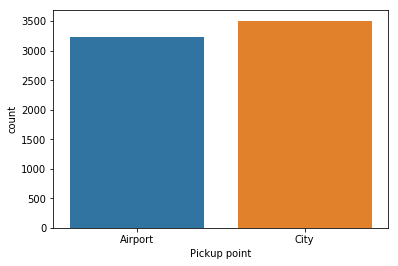

In [14]:
sns.countplot(x ="Pickup point",data = data1)

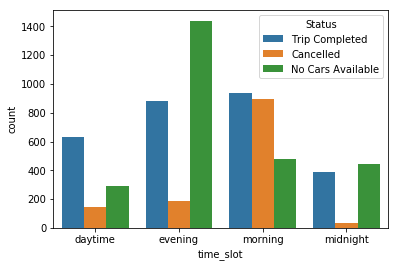

In [15]:
sns.countplot(x = "time_slot",data= data1,hue = "Status")


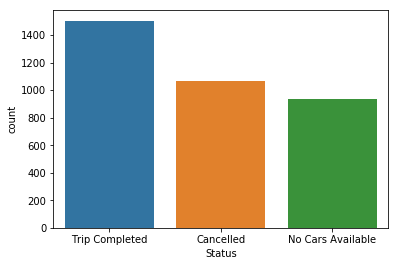

In [16]:
sns.countplot(x = "Status",data= data1[data1["Pickup point"]=="City"])


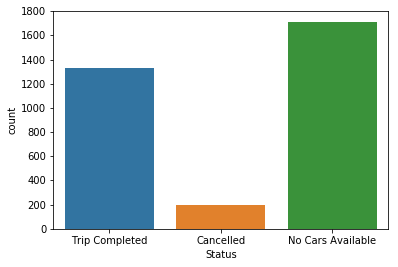

In [17]:
sns.countplot(x = "Status",data= data1[data1["Pickup point"]!="City"])

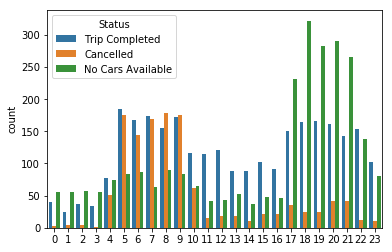

In [18]:
a= []
for i in range(len(data1["Request timestamp"])):
    a.append(data1["Request timestamp"][i].hour)
sns.countplot(x =a ,hue=data1["Status"])

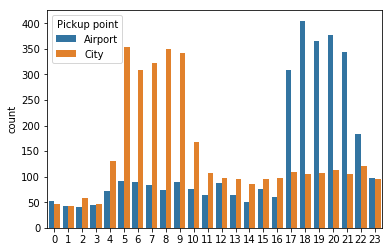

In [19]:
sns.countplot(x =a ,hue=data1["Pickup point"])

'\n\n   more evening requestes at airport\n   more morning requeses at city\n\n'

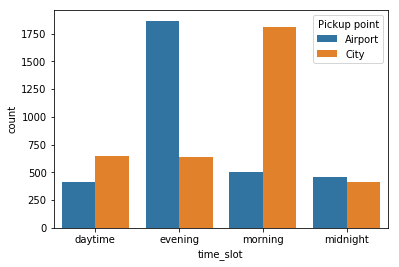

In [20]:
sns.countplot(x =data1["time_slot"] ,hue=data1["Pickup point"])
"""

   more evening requestes at airport
   more morning requeses at city

"""

In [21]:
ml_data = data1[["Pickup point","Status","total_time_in_sec","day of weak","time_slot"]]
ml_data.head()

,Pickup point,Status,total_time_in_sec,day of weak,time_slot
0,Airport,Trip Completed,4140.0,Monday,daytime
1,Airport,Trip Completed,3000.0,Monday,evening
2,City,Trip Completed,2460.0,Tuesday,morning
3,Airport,Trip Completed,3300.0,Tuesday,evening
4,City,Trip Completed,3151.0,Wednesday,morning


In [22]:
X= ml_data.iloc[:,[0,3,4]]
X.head()

,Pickup point,day of weak,time_slot
0,Airport,Monday,daytime
1,Airport,Monday,evening
2,City,Tuesday,morning
3,Airport,Tuesday,evening
4,City,Wednesday,morning


In [23]:
X = ml_data.iloc[:,[0,3,4]].values
y = ml_data.iloc[:, [1]].values


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_0 = LabelEncoder()


X[:, 0] = labelencoder_0.fit_transform(X[:, 0])
X[:, 1] = labelencoder_0.fit_transform(X[:, 1])
X[:, 2] = labelencoder_0.fit_transform(X[:, 2])


onehotencoder = OneHotEncoder(categorical_features = [0,1,2])
X = onehotencoder.fit_transform(X).toarray()



C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [24]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
X = pd.DataFrame(X[:,[0,2,3,4,5,7,8,9]]).values
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
y

array([['Trip Completed'],
       ['Trip Completed'],
       ['Trip Completed'],
       ...,
       ['No Cars Available'],
       ['No Cars Available'],
       ['No Cars Available']], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
y = ml_data.iloc[:, [1,0]].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y[:,0] = labelencoder_y.fit_transform(y[:,0])

y[:,1] = labelencoder_y.fit_transform(y[:,1])
onehotencoder = OneHotEncoder(categorical_features = [0])
y = onehotencoder.fit_transform(y).toarray()


C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [29]:
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.],
       ...,
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.]])

In [30]:
y=y[:,:-1]

In [31]:
y = y[:,:-1]

In [32]:
y

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [34]:
def ml_array(per1,per2):
    
    day_dic={"Monday" : "0100","Tuesday" : "0001","Wednesday" : "0000","Thursday" : "0010","Friday" : "1000"}
    timeslot_dict = {"daytime" : "100","evening" : "010","morning" : "000","midnight" : "001"}
    predict_dict = {"00" : "trip will be completed","01":"no cars available","10":"cancled"}
    arr = []
    pre_arr=""
    arr.append(int(per2))
    for i in day_dic[tday(per1)]:
        arr.append(int(i))
    for i in timeslot_dict[to_time(per1)]:
        arr.append(int(i))
    temp = regressor.predict([arr])
    #predict_dict = {"00" : "trip will be completed","01":"no cars available","10":"cancled"}
    try:
        
        return predict_dict[str(int(temp[0][0]))+str(int(temp[0][1]))]
    except:
        return "enter proper date"
    

In [35]:
d = to_date(input("enter date\n format day-month-year hour:min:sec/\n\n"))
p = input("airport = 1\ncity = 0\n\n")
ml_array(d,p)
    

enter date
 format day-month-year hour:min:sec/

10-02-2020 12:20:00
airport = 1
city = 0

1


'trip will be completed'

In [36]:
data1.tail()

,Pickup point,Status,Request timestamp,Drop timestamp,time taken,total_time_in_sec,day of weak,month,time_slot
6740,City,No Cars Available,2016-07-15 23:49:03,NaT,NaT,NaN,Friday,July,midnight
6741,Airport,No Cars Available,2016-07-15 23:50:05,NaT,NaT,NaN,Friday,July,midnight
6742,City,No Cars Available,2016-07-15 23:52:06,NaT,NaT,NaN,Friday,July,midnight
6743,City,No Cars Available,2016-07-15 23:54:39,NaT,NaT,NaN,Friday,July,midnight
6744,Airport,No Cars Available,2016-07-15 23:55:03,NaT,NaT,NaN,Friday,July,midnight
